# 05B. Orbital motions

### Mingyang Lu

### 2/6/2024

# Modeling an orbital motionFrom now on, we will only use velocity Verlet method for solving Newton's equation of motion. We generalize the method for systems of multiple variables. These systems can have a particle in 2D or 3D, or multiple particles. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Velocity Verlet method for high dimensional systems (2D, 3D, or multiple particles)
def velocity_verlet_generic(f, t0, x0, v0, t_total, dt, **kwargs):
    # f:  2nd derivative function
    # t0: initial time
    # x0: a vector of initial position x
    # v0: a vector of initial velocity v
    # t_total: total simulation time
    # dt: time step size 
    t_all = np.arange(t0, t_total + dt, dt)
    nt_all = len(t_all)
    nx = len(x0)
    x_all = np.zeros((nt_all, nx))
    v_all = np.zeros((nt_all, nx))
    x_all[0,:] = x0
    v_all[0,:] = v0 
    for i in range(1, nt_all):
        v_half = v_all[i - 1,:] + 0.5 * dt * f(t_all[i - 1], x_all[i - 1,:], **kwargs)
        x_all[i,:] = x_all[i - 1,:] + dt * v_half
        v_all[i,:] = v_half + 0.5 * dt * f(t_all[i], x_all[i,:], **kwargs)
    return np.column_stack((t_all, x_all, v_all))


In this new example, a 2D-particle is driven by a gravitational force from the center (*e.g.*, Earth)

$$f(r) = \frac{G}{r} \tag{3}$$
$G$ is a constant. The direction of the force is from the particle to the center. We can write the $x$ and $y$ components of the force, $f_x$ and $f_y$, as

\begin{equation}
\begin{cases}
  f_x(x, y) = - \frac{Gx}{r^2} \tag{4}\\
  f_y(x, y) = - \frac{Gy}{r^2} 
\end{cases}
\end{equation}

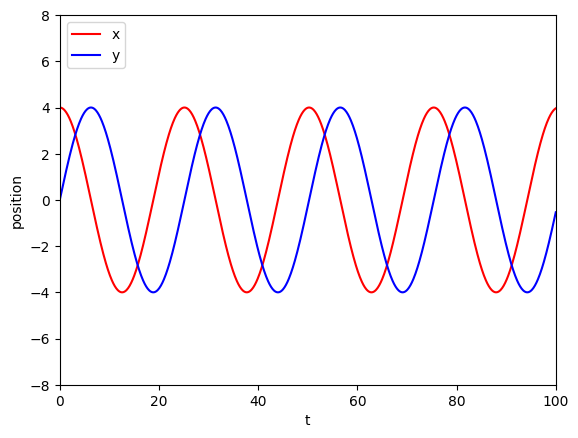

In [2]:
# gravitational force in 2D
def f_g2d(t, x, G):
    # x: a vector of size two: x, y positions
    r2 = np.sum(x ** 2)
    return -x * G / r2

results_g2d = velocity_verlet_generic(f=f_g2d, t0=0, x0=np.array([4, 0]), v0=np.array([0, 1]), t_total=100, dt=0.1, G=1)

plt.plot(results_g2d[:, 0], results_g2d[:, 1], color='red', label='x')
plt.plot(results_g2d[:, 0], results_g2d[:, 2], color='blue', label='y')
plt.xlabel('t')
plt.ylabel('position')
plt.xlim(0, 100)
plt.ylim(-8, 8)
plt.legend(loc='upper left')
plt.show()

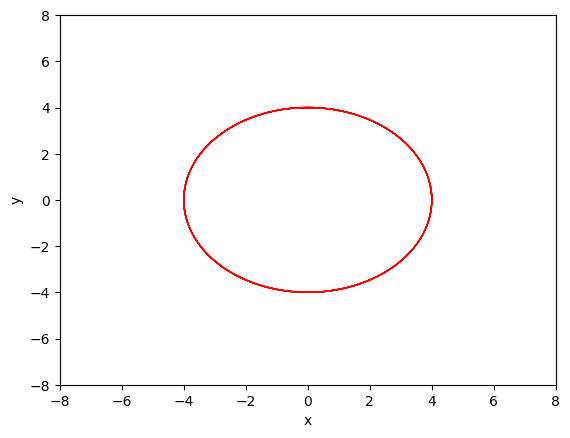

In [3]:
plt.plot(results_g2d[:, 1], results_g2d[:, 2], color='red', linestyle='-', linewidth=1)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

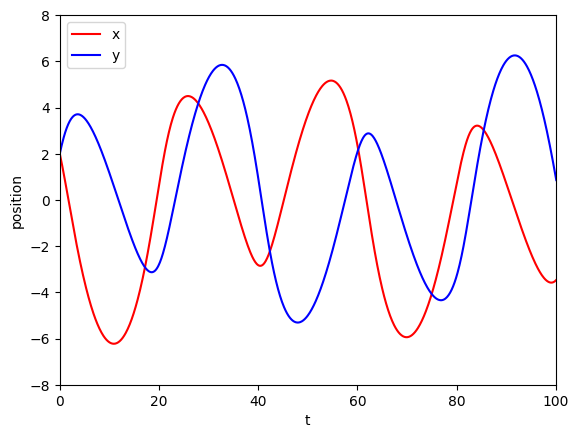

In [4]:
# Another simulation with a different initial condition
results_g2d2 = velocity_verlet_generic(f=f_g2d, t0=0, x0=np.array([2, 2]), v0=np.array([-1, 1]), t_total=1000, dt=0.1, G=1)

plt.plot(results_g2d2[:, 0], results_g2d2[:, 1], color='red', label='x')
plt.plot(results_g2d2[:, 0], results_g2d2[:, 2], color='blue', label='y')
plt.xlabel('t')
plt.ylabel('position')
plt.xlim(0, 100)
plt.ylim(-8, 8)
plt.legend(loc='upper left')
plt.show()

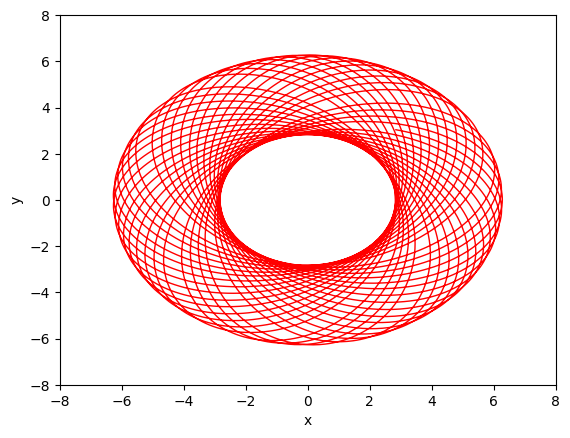

In [5]:
plt.plot(results_g2d2[:, 1], results_g2d2[:, 2], color='red', linestyle='-', linewidth=1)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

# Two-body problem

We then consider two particles of equal masses in 2D, a system that can be described by 4 variables.   

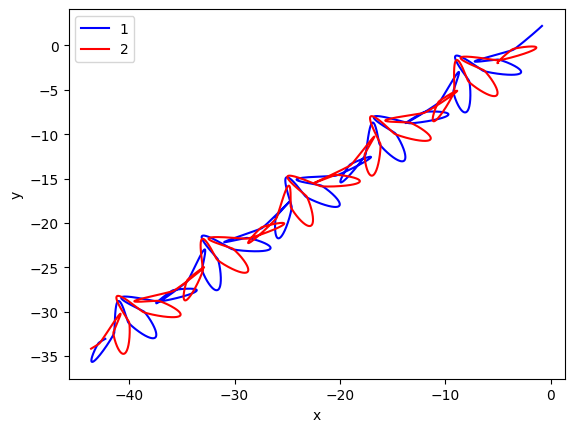

In [6]:
# Define the function for gravitational forces between two particles in 2D
def f_2body_2d(t, x, G):
    r12_2 = (x[0] - x[2]) ** 2 + (x[1] - x[3]) ** 2
    
    f1_x = (x[2] - x[0]) / r12_2
    f1_y = (x[3] - x[1]) / r12_2
    f2_x = (x[0] - x[2]) / r12_2
    f2_y = (x[1] - x[3]) / r12_2

    return G * np.array([f1_x, f1_y, f2_x, f2_y])


# Generate random initial conditions
np.random.seed(1)
x0 = np.random.uniform(-5, 5, 4)
v0 = np.random.uniform(-0.2, 0.2, 4)

# Run the simulation
results_2body = velocity_verlet_generic(f=f_2body_2d, t0=0, x0=x0, v0=v0, t_total=300, dt=0.01, G=1)

# Plot the results
plt.plot(results_2body[:, 1], results_2body[:, 2], color='blue', label='1')
plt.plot(results_2body[:, 3], results_2body[:, 4], color='red', label='2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

The time trajectories contain patterns but with a constant shift, because of a non-zero total momentum. To eliminate the constant shift (consider that the system is in another reference with a constant velocity), we can shift the velocities with constant values, so that the system has zero total momentum.

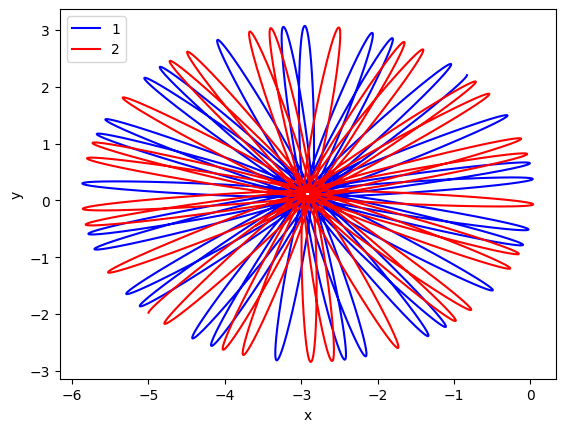

In [7]:
# velocity is shifted to remove net changes 
def center_v(v, ndim):
    # v: a vector of velocities 
    # ndim: dimension of the system
    v_mat = np.reshape(v, (-1, ndim), order='C')
    v_means = np.mean(v_mat, axis=0)
    return v - np.tile(v_means, len(v) // ndim)

# Generate random initial conditions for velocity
np.random.seed(1)
x0 = np.random.uniform(-5, 5, 4)
v0 = np.random.uniform(-0.2, 0.2, 4)
v0 = center_v(v0,2)

# Run the simulation
results_2body = velocity_verlet_generic(f=f_2body_2d, t0=0, x0=x0, v0=v0,
                                        t_total=300, dt=0.01, G=1)

# Plot the results
plt.plot(results_2body[:, 1], results_2body[:, 2], color='blue', label='1')
plt.plot(results_2body[:, 3], results_2body[:, 4], color='red', label='2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

# Three-body problem

Now we consider three particles of equal masses in 2D, a system that can be described by 6 variables.   


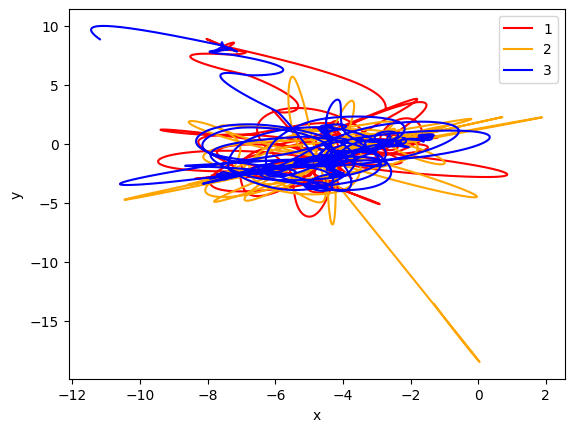

In [8]:
# Define the function for the gravitational forces for three particles in 2D
def f_3body_2d(t, x, G):
    r12_2 = (x[0] - x[2])**2 + (x[1] - x[3])**2
    r13_2 = (x[0] - x[4])**2 + (x[1] - x[5])**2
    r23_2 = (x[2] - x[4])**2 + (x[3] - x[5])**2
    
    f1_x = (x[2] - x[0]) / r12_2 + (x[4] - x[0]) / r13_2
    f1_y = (x[3] - x[1]) / r12_2 + (x[5] - x[1]) / r13_2
    f2_x = (x[0] - x[2]) / r12_2 + (x[4] - x[2]) / r23_2
    f2_y = (x[1] - x[3]) / r12_2 + (x[5] - x[3]) / r23_2
    f3_x = (x[0] - x[4]) / r13_2 + (x[2] - x[4]) / r23_2
    f3_y = (x[1] - x[5]) / r13_2 + (x[3] - x[5]) / r23_2
    
    return G * np.array([f1_x, f1_y, f2_x, f2_y, f3_x, f3_y])

# Example of generating random initial conditions
np.random.seed(3)
v0 = np.random.uniform(-0.02, 0.02, size=6)
x0 = np.random.uniform(-5, 5, size=6)
v0 = center_v(v0,3)

# Generate simulation results using the velocity verlet method
results_3body = velocity_verlet_generic(f=f_3body_2d, t0=0, x0=x0, v0=v0,
                                        t_total=300, dt=0.01, G=1)

# Plot the trajectories of the three particles
plt.plot(results_3body[:, 1], results_3body[:, 2], color="red", label="1")
plt.plot(results_3body[:, 3], results_3body[:, 4], color="orange", label="2")
plt.plot(results_3body[:, 5], results_3body[:, 6], color="blue", label="3")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper right")
plt.show()